# DC Simulation Example

In this example, we run a **DC** simulation of Qorvo SiC transistor.

This is the same code saved in the **10_DC.py**, with more interactive descriptions.

## 1. Run a Simulation

After running below block of code, we have the simulation result in a Pandas DataFrame **df**.

In [1]:
from PyQSPICE import clsQSPICE as pqs

import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pqs.chdir(".")
run = pqs("UJ3N065080")

run.InitPlot()

run.qsch2cir()
run.cir2qraw()

df = run.LoadQRAW(["Id(J1)"])

print(df)

              V2        Id(J1)  Step
0       0.000000  1.160000e-12     0
1       0.002000  3.885333e-03     0
2       0.004001  7.770666e-03     0
3       0.006001  1.165600e-02     0
4       0.008002  1.554133e-02     0
...          ...           ...   ...
29995   9.991998  9.254473e+01     5
29996   9.993999  9.255042e+01     5
29997   9.995999  9.255612e+01     5
29998   9.998000  9.256181e+01     5
29999  10.000000  9.256751e+01     5

[30000 rows x 3 columns]


As you can see the last "print()" command, this **df** has the drain-voltage **V2** and the drain-currnet **Id(J1)**, plus the index of **.STEP** simulations.

## 2. Plotting

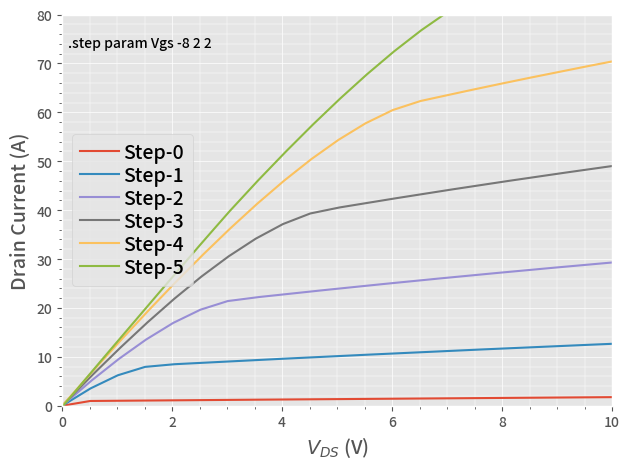

In [2]:
# Prepare a blank plotting area
plt.close("all")
fig, ax = plt.subplots(tight_layout=True)

# Plot DC curves of all ".STEP"
for i in range(run.sim['Nstep']):
    df[df.Step == i].plot(ax=ax, x=run.sim['Xlbl'],  y="Id(J1)", label="Step-" + str(i))

# Axis setup = begin =
ax.set_xlim(run.sim['Xmin'],run.sim['Xmax'])
ax.set_ylim(0,80)
ax.set_ylabel('Drain Current (A)', fontsize=14)
ax.set_xlabel('$V_{DS}$ (V)', fontsize=14)
ax.minorticks_on()

ax.grid(which='major', linewidth="0.5")
ax.grid(which='minor', linewidth="0.35")
# Axis setup = end =

# Legend
ax.text(0.1, 70, run.sim['StepInfo'])
plt.legend(ncol=1, loc="center left",fancybox=True)

# Save the Plot in PNG file
plt.savefig(run.path['base'] + "_plt.png", format='png', bbox_inches='tight')
plt.show()

plt.close('all')